In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
MAX_POINTS = 20

In [11]:
def x_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    num = (x1*y2 - y1*x2) * (x3-x4) - (x1-x2) * (x3*y4 - y3*x4)
    den = (x1-x2) * (y3-y4) - (y1-y2) * (x3-x4)
    return num/den

In [12]:
def y_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    num = (x1*y2 - y1*x2) * (y3-y4) - (y1-y2) * (x3*y4 - y3*x4)
    den = (x1-x2) * (y3-y4) - (y1-y2) * (x3-x4)
    return num/den

In [13]:
def clip(poly_points, poly_size, x1, y1, x2, y2):
    new_points = np.zeros((MAX_POINTS, 2), dtype=float)
    new_poly_size = 0
    for i in range(poly_size):
        k = (i+1) % poly_size
        ix, iy = poly_points[i]
        kx, ky = poly_points[k]

        i_pos = (x2-x1) * (iy-y1) - (y2-y1) * (ix-x1)
        k_pos = (x2-x1) * (ky-y1) - (y2-y1) * (kx-x1)

        if i_pos < 0 and k_pos < 0:
            new_points[new_poly_size] = [kx, ky]
            new_poly_size += 1
        elif i_pos >= 0 and k_pos < 0:
            new_points[new_poly_size] = [x_intersect(x1, y1, x2, y2, ix, iy, kx, ky),
                                        y_intersect(x1, y1, x2, y2, ix, iy, kx, ky)]
            new_poly_size += 1
            new_points[new_poly_size] = [kx, ky]
            new_poly_size += 1
        elif i_pos < 0 and k_pos >= 0:
            new_points[new_poly_size] = [x_intersect(x1, y1, x2, y2, ix, iy, kx, ky), y_intersect(x1, y1, x2, y2, ix, iy, kx, ky)]
            new_poly_size += 1
        else:
            pass
    clipped_poly_points = np.zeros((new_poly_size, 2), dtype=float)
    for i in range(new_poly_size):
        clipped_poly_points[i] = new_points[i]

    return clipped_poly_points, new_poly_size

In [19]:
def suthHodgClip(poly_points, poly_size, clipper_points, clipper_size):
    for i in range(clipper_size):
        k = (i+1) % clipper_size
        poly_points, poly_size = clip(poly_points, poly_size, clipper_points[i][0], clipper_points[i][1], clipper_points[k][0], clipper_points[k][1])

    return poly_points, poly_size

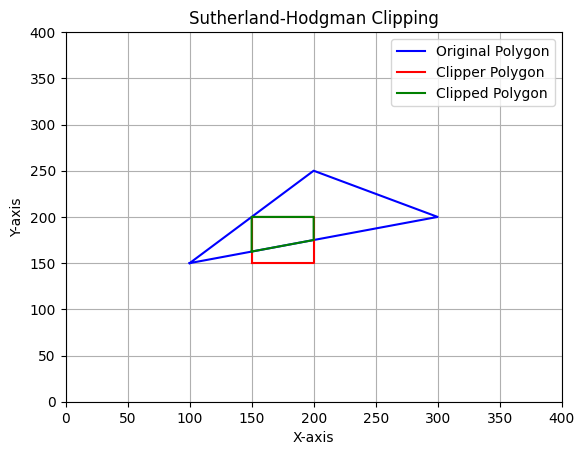

In [20]:
if __name__ == "__main__":

    poly_size = 3
    poly_points = np.array([[100,150], [200,250], [300,200]], dtype=float)

    clipper_size = 4
    clipper_points = np.array([[150,150], [150,200], [200,200], [200,150]], dtype=float)

    clipped_poly_points, clipped_poly_size = suthHodgClip(poly_points, poly_size, clipper_points, clipper_size)

    fig, ax = plt.subplots()

    x = np.append(poly_points[:, 0], poly_points[0, 0])
    y = np.append(poly_points[:, 1], poly_points[0, 1])
    ax.plot(x, y, 'b-', label='Original Polygon')

    x = np.append(clipper_points[:, 0], clipper_points[0, 0])
    y = np.append(clipper_points[:, 1], clipper_points[0, 1])
    ax.plot(x, y, 'r-', label='Clipper Polygon')

    x = np.append(clipped_poly_points[:clipped_poly_size, 0], clipped_poly_points[0, 0]) # Close the clipped polygon
    y = np.append(clipped_poly_points[:clipped_poly_size, 1], clipped_poly_points[0, 1])
    ax.plot(x, y, 'g-', label='Clipped Polygon')

    ax.set_xlim(0, 400)
    ax.set_ylim(0, 400)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Sutherland-Hodgman Clipping')
    ax.legend()
    plt.grid(True)
    plt.show()